In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Iris Data Set
df = pd.read_csv("https://bit.ly/2Mg0qkZ", header = None, encoding = "UTF")

In [3]:
df.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'category']
df.head()

,sepal-length,sepal-width,petal-length,petal-width,category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


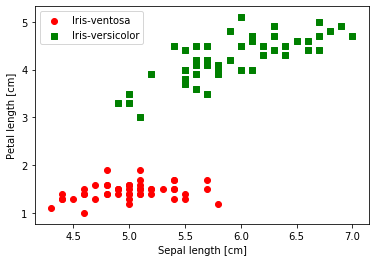

In [4]:
df = df.loc[0:100, ['sepal-length', 'petal-length', 'category']]

X = df.loc[0:100, ['sepal-length', 'petal-length']].values
y = df.category.values
y = np.where(y == 'Iris-setosa', -1, 1)

plt.scatter(X[0:50, 0], X[0:50, 1], color = "red", marker = "o", label = "Iris-ventosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color = "green", marker = "s", label = "Iris-versicolor")
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 2)
plt.show()

In [5]:
# Raw implementation
class Perceptron:
    """
    Perceptron learning algorithm implementation
    """
    
    def __init__(self, eta = 1, random_seed = 1):
        self.eta = eta
        self.random_seed = random_seed
        
    def fit(self, X, y):
        rn = np.random.RandomState(self.random_seed)
        self.w_ = rn.normal(loc = 0, scale = 0.01, size = X.shape[1] + 1)
        errors = True
        
        while errors:
            errors = 0
            for X_i, y_i in zip(X, y):
                if y_i != self.predict(X_i):
                    # update weights vector for misclassified points
                    update = self.eta * y_i
                    self.w_[1:] += update * X_i
                    self.w_[0] += update 
                    errors += 1
                    
        return self
    
    def predict(self, X_i):
        eval_func = np.dot(X_i, self.w_[1:]) + self.w_[0] # ATTENTION: this implemented arguments order is more intuitive
        return np.where(eval_func >= 0, 1, -1)

In [6]:
my_perceptron = Perceptron()
my_perceptron.fit(X, y)

print("Weights vector: {}.".format(my_perceptron.w_))

Weights vector: [-1.98375655 -3.50611756  9.19471828].


In [7]:
def plot_decision_regions(X, y, classifier, feature_names, resolution = 0.01):
    # general settings
    markers = ["o", "s", "*", "x", "v"]
    colors  = ("red", "green", "blue", "gray", "cyan")
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    # define a grid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # classify each grid point
    result = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    result = result.reshape(xx1.shape)
    # make a plot
    plt.contourf(xx1, xx2, result, colors = colors[0:len(np.unique(y))], alpha = 0.5)
    for index, value in enumerate(np.unique(y)): # plot each point & 'enumerate()' returns index and value of the given array
        plt.scatter(x = X[y == value, 0], y = X[y == value, 1], # select each X and y vectors by creating a mask
                    color = colors[index],
                    marker = markers[index],
                    label = feature_names[index],
                    edgecolor = 'black')

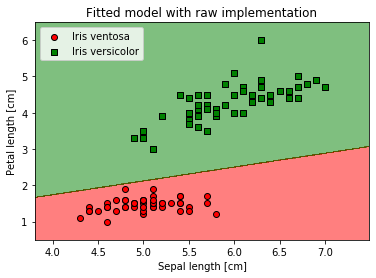

In [8]:
feature_names = ['Iris ventosa', 'Iris versicolor']
plot_decision_regions(X, y, my_perceptron, feature_names)
plt.title('Fitted model with raw implementation')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 2)
plt.show()

In [9]:
# Sklearn usage
from sklearn.linear_model import Perceptron

sklearn_perceptron = Perceptron()
sklearn_perceptron.fit(X, y)

print("Weight vector (without w_0): {}.".format(sklearn_perceptron.coef_))

Weight vector (without w_0): [[-2.4  5. ]].


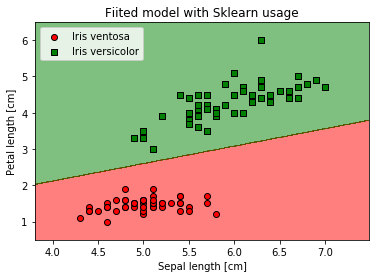

In [10]:
feature_names = ['Iris ventosa', 'Iris versicolor']
plot_decision_regions(X, y, sklearn_perceptron, feature_names)
plt.title('Fiited model with Sklearn usage')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 2)
plt.show()